In [1]:
from numpy.random import seed, random, randint, choice
from numpy import median, sort
from misc import append_gauges, generate_figures, measure_time
import numpy as np
# from experiments import check_results, check_fails, check_time_performance
from time import time
import matplotlib.pyplot as plt
seed(1)

In [91]:
13300*56

744800

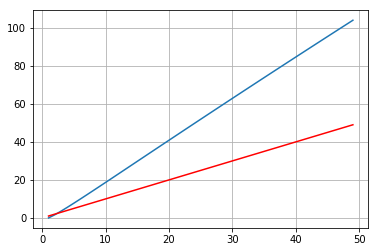

In [98]:
x=np.arange(1,50)
# plt.plot(x, .5*x**.75-x**.5)
plt.plot(x, x**.75*np.log2(x))
plt.plot(x, x, color='r')
plt.grid()
plt.show()

In [2]:
def median_r(data):
    '''
    :param data:
    :return: median element value
    Implement randomized algorithm here
    Use numpy.random.chose function to make a subset R
    '''
    # %%% START YOUR CODE HERE %%%
    n = data.size
    sub_n = int(n**.75)+1
    subset = choice(data, sub_n)
    subset.sort()
    index_d = max(0,int(.5*n**.75-n**.5)-1)
    d = subset[index_d]
    index_u = min(int(.5*n**.75+n**.5)-1,int(n**.75))
    u = subset[index_u]
    
    C = data[(data>=d) & (data<=u)] #.copy()
    
    
    ld = data[data<d].size
    lu = data[data>u].size
    
    if ld>n/2 or lu>n/2:
        return None
    Csize = C.size
    if Csize <= 4*n**.75:
        C.sort()
        
    else:
        return None
    mdn_idx = min(int(n/2 - ld), Csize-1)
    return C[mdn_idx]
    # %%% END YOUR CODE HERE %%%
    

def median_s(data):
    sorted = sort(data)
    return sorted[len(data) // 2]#, sorted[len(data)//2-1]


In [3]:
data = random(20)
print(data)
median_r(data)
print(data)


[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
   1.46755891e-01   9.23385948e-02   1.86260211e-01   3.45560727e-01
   3.96767474e-01   5.38816734e-01   4.19194514e-01   6.85219500e-01
   2.04452250e-01   8.78117436e-01   2.73875932e-02   6.70467510e-01
   4.17304802e-01   5.58689828e-01   1.40386939e-01   1.98101489e-01]
[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
   1.46755891e-01   9.23385948e-02   1.86260211e-01   3.45560727e-01
   3.96767474e-01   5.38816734e-01   4.19194514e-01   6.85219500e-01
   2.04452250e-01   8.78117436e-01   2.73875932e-02   6.70467510e-01
   4.17304802e-01   5.58689828e-01   1.40386939e-01   1.98101489e-01]


In [6]:
print(np.mean([median_s(data), median_s(data)]))
print(np.median(data))

0.396767474231
0.371164100637


In [88]:
def check_results():
    """
    This function checks that you are getting correct results.
    Write your code here to calculate the number of different results
    1) between randomized implementation and numpy median
    2) between randomized implementation and sorting middle element
    """
    sorting_vs_random = []
    numpy_vs_random = []
    sizes = randint(500000, size=10)*2-1

    for size in sizes:
        sorting_vs_random_on_size = 0
        numpy_vs_random_on_size = 0
        for i in range(100):
            data = random(size)
            # %%% START YOUR CODE HERE %%%
#             while True:
            rnd_res = median_r(data)
            sort_res = median_s(data)
            nmp_med = median(data)
            if rnd_res == None:
                sorting_vs_random_on_size += 1
                numpy_vs_random_on_size += 1
            else:
                sorting_vs_random_on_size += (rnd_res!=sort_res)
                numpy_vs_random_on_size += (rnd_res!=nmp_med)
#             if size%2:
                
            # %%% END YOUR CODE HERE %%%
        sorting_vs_random.append(sorting_vs_random_on_size)
        numpy_vs_random.append(numpy_vs_random_on_size)
    print("sorting vs random different results", sorting_vs_random)
    print("numpy vs random different results", numpy_vs_random)


def check_fails():
    """
    This function checks how often randomized algorithm fails
    """
    fails_number = []
    sizes = []
    for zeros in range(1,9):
        size = 10**zeros
        sizes.append(size)
    for size in sizes:
        fails_on_size = 0
        for i in range(100):
            data = random(size)
            # %%% START YOUR CODE HERE %%%
            rnd_res = median_r(data)
            if rnd_res == None:
                fails_on_size += 1
            # %%% END YOUR CODE HERE %%%
        fails_number.append(fails_on_size)
    print("numbers of fails", fails_number)


def gauge_algorithms(data_size, repeats=100):
    sorting_avg = 0.
    np_avg = 0.
    randomized_avg = 0.
    count = 0
    for i in range(repeats):
        data = random(data_size)
        
        dur = time()
        reslt = median_r(data)
        randomized_avg += (reslt!=None)*(time()-dur)
        count += reslt!=None
        
        dur = time()
        reslt = median(data)
        np_avg += time()-dur
        
        dur = time()
        reslt = median_s(data)
        sorting_avg += time()-dur
        
    return sorting_avg/repeats, np_avg/repeats, randomized_avg/count


def check_time_performance():
    sizes = []
    for zeros in range(1,9):
        size = 10**zeros
        sizes.append(size)

    gauges_collection = ([], [], [])
    for size in sizes:
        gauge = gauge_algorithms(size)
        append_gauges(gauges_collection, gauge)
    generate_figures(gauges_collection, "size", sizes)
#     print('col=',gauges_collection)


In [83]:
check_fails()

numbers of fails [5, 1, 0, 0]


In [89]:


start = time()
check_results()
check_fails()
check_time_performance()
finish = time()

print("total time in minutes", int((finish - start) / 60))

sorting vs random different results [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
numpy vs random different results [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
numbers of fails [7, 1, 0, 0, 0, 0, 0, 0]
sorting average time [5.474090576171875e-06, 7.295608520507813e-06, 4.214048385620117e-05, 0.0004909276962280273, 0.006080038547515869, 0.07485368967056275, 0.8841674375534058, 10.185598249435424]
numpy average time [3.513813018798828e-05, 3.4415721893310546e-05, 5.061149597167969e-05, 0.00014810323715209962, 0.0010582375526428222, 0.011675102710723877, 0.12808300971984862, 1.2648700404167175]
randomized average time [3.4515303794783774e-05, 3.6814212799072265e-05, 7.186651229858399e-05, 0.0003221368789672852, 0.0023229169845581056, 0.022955403327941895, 0.2088031554222107, 1.9678602313995361]
total time in minutes 32


In [103]:
x = np.geomspace(1,10000, 5)

In [104]:
x[:10]

array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04])

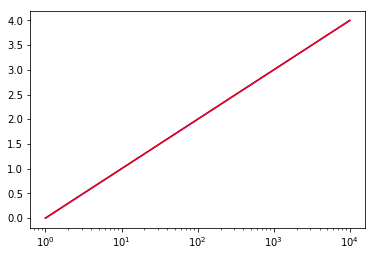

In [107]:
y = np.arange(5)
plt.plot(x,y, color='b')
plt.semilogx(x,y, color='r')
plt.show()

sorting average time [  5.47409058e-06   7.29560852e-06   4.21404839e-05   4.90927696e-04
   6.08003855e-03   7.48536897e-02   8.84167438e-01   1.01855982e+01]
numpy average time [  3.51381302e-05   3.44157219e-05   5.06114960e-05   1.48103237e-04
   1.05823755e-03   1.16751027e-02   1.28083010e-01   1.26487004e+00]
randomized average time [  3.45153038e-05   3.68142128e-05   7.18665123e-05   3.22136879e-04
   2.32291698e-03   2.29554033e-02   2.08803155e-01   1.96786023e+00]


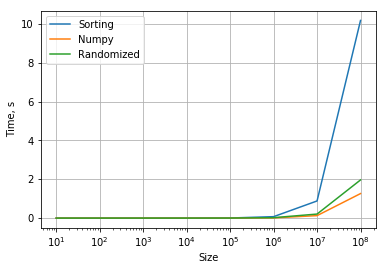

In [114]:
    xrange = []
    for zeros in range(1,9):
        size = 10**zeros
        xrange.append(size)
    sorting_avg, np_avg, randomized_avg = np.array([5.474090576171875e-06, 7.295608520507813e-06, 4.214048385620117e-05, 0.0004909276962280273, 0.006080038547515869, 0.07485368967056275, 0.8841674375534058, 10.185598249435424]),np.array([3.513813018798828e-05, 3.4415721893310546e-05, 5.061149597167969e-05, 0.00014810323715209962, 0.0010582375526428222, 0.011675102710723877, 0.12808300971984862, 1.2648700404167175]),np.array([3.4515303794783774e-05, 3.6814212799072265e-05, 7.186651229858399e-05, 0.0003221368789672852, 0.0023229169845581056, 0.022955403327941895, 0.2088031554222107, 1.9678602313995361])
    print("sorting average time", sorting_avg)
    print("numpy average time", np_avg)
    print("randomized average time", randomized_avg)
    plt.figure()
    plt.semilogx(xrange, sorting_avg, label="Sorting")
    plt.semilogx(xrange, np_avg, label="Numpy")
    plt.semilogx(xrange, randomized_avg, label="Randomized")
    plt.ylabel("Time, s")
    plt.xlabel('Size')
    plt.grid(True)
    plt.legend()
    plt.show()

In [87]:


start = time()
check_results()
check_fails()
check_time_performance()
finish = time()

print("total time in minutes", int((finish - start) / 60))

sorting vs random different results [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
numpy vs random different results [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
numbers of fails [5, 0, 0, 0, 0, 0, 0, 0]
sorting average time [6.535053253173828e-06, 7.4982643127441405e-06, 4.224777221679687e-05, 0.0004911446571350098, 0.006098811626434326, 0.07503232479095459, 0.8873195886611939]
numpy average time [3.7424564361572265e-05, 3.456830978393555e-05, 5.107641220092773e-05, 0.0001467752456665039, 0.0010332679748535157, 0.011625254154205322, 0.12503695487976074]
randomized average time [3.897283495086984e-05, 3.7000179290771484e-05, 7.152795791625976e-05, 0.00032364368438720704, 0.0023274660110473634, 0.02298102617263794, 0.21079514503479005]
total time in minutes 9
